6.549797e-08
8.946008e-08
Processing subtraction for image  0


c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:71: RuntimeWarning: divide by zero encountered in divide
  sides = (np.arctan(np.abs(np.arange(height)[:, np.newaxis] - center_y)/
c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:71: RuntimeWarning: invalid value encountered in divide
  sides = (np.arctan(np.abs(np.arange(height)[:, np.newaxis] - center_y)/


Processing subtraction for image  1
Processing subtraction for image  2
Processing subtraction for image  3
Processing subtraction for image  4
Processing subtraction for image  5
Processing subtraction for image  6
Processing subtraction for image  7
Processing subtraction for image  8
Processing subtraction for image  9
Processing subtraction for image  10
Processing calculations for image  0
0.0
0 % done
16 % done


c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:20: RuntimeWarning: divide by zero encountered in divide
  pBratioFull = image_data_pB/image_data_tB
c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:20: RuntimeWarning: invalid value encountered in divide
  pBratioFull = image_data_pB/image_data_tB
c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:39: RuntimeWarning: invalid value encountered in arcsin
  angleMatrixPositive[i][j] = epsilon + np.rad2deg(np.arcsin(np.sqrt((1 - pBratio)/(1 + pBratio))))
c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:40: RuntimeWarning: invalid value encountered in arcsin
  angleMatrixNegative[i][j] = epsilon + np.rad2deg(np.arcsin(-np.sqrt((1 - pBratio)/(1 + pBratio))))
c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:39: RuntimeWarning: invalid value encountered in sqrt
  angleMatrixPositive[i][j] = epsilon + np.rad2deg(np.arcsin(np.sqrt((1 - pBratio)/(1 + pBratio))))
c:

33 % done
50 % done
66 % done
83 % done
positive:  33.088753606694794
negative:  -9.709847356694794
Processing calculations for image  1
0.0
0 % done
16 % done
33 % done
50 % done
66 % done
83 % done
positive:  33.75497341204643
negative:  -10.376067162046432
Processing calculations for image  2
0.0
0 % done
16 % done
33 % done
50 % done
66 % done
83 % done
positive:  34.410036463544174
negative:  -11.031130213544177
Processing calculations for image  3
0.0
0 % done
16 % done
33 % done
50 % done
66 % done
83 % done
positive:  28.704120283008905
negative:  -5.325214033008905
Processing calculations for image  4
0.0
0 % done
16 % done
33 % done
50 % done
66 % done
83 % done
positive:  41.052574022651484
negative:  -17.67366777265148
Processing calculations for image  5
0.0
0 % done
16 % done
33 % done
50 % done
66 % done
83 % done
positive:  55.06995150068753
negative:  -31.69104525068753
Processing calculations for image  6
0.0
0 % done
16 % done
33 % done
50 % done
66 % done
83 % done


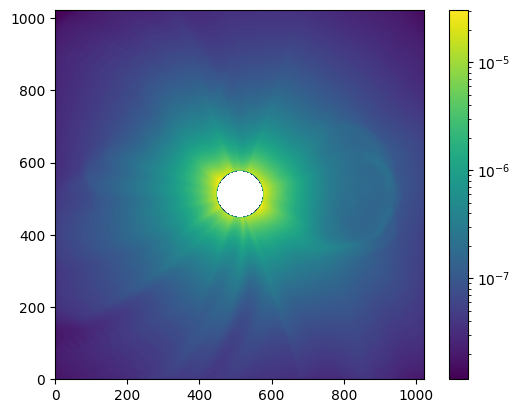

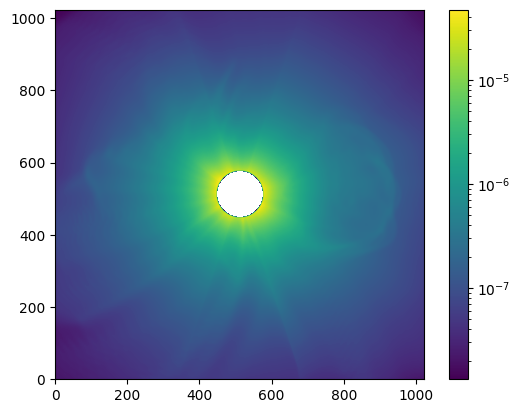

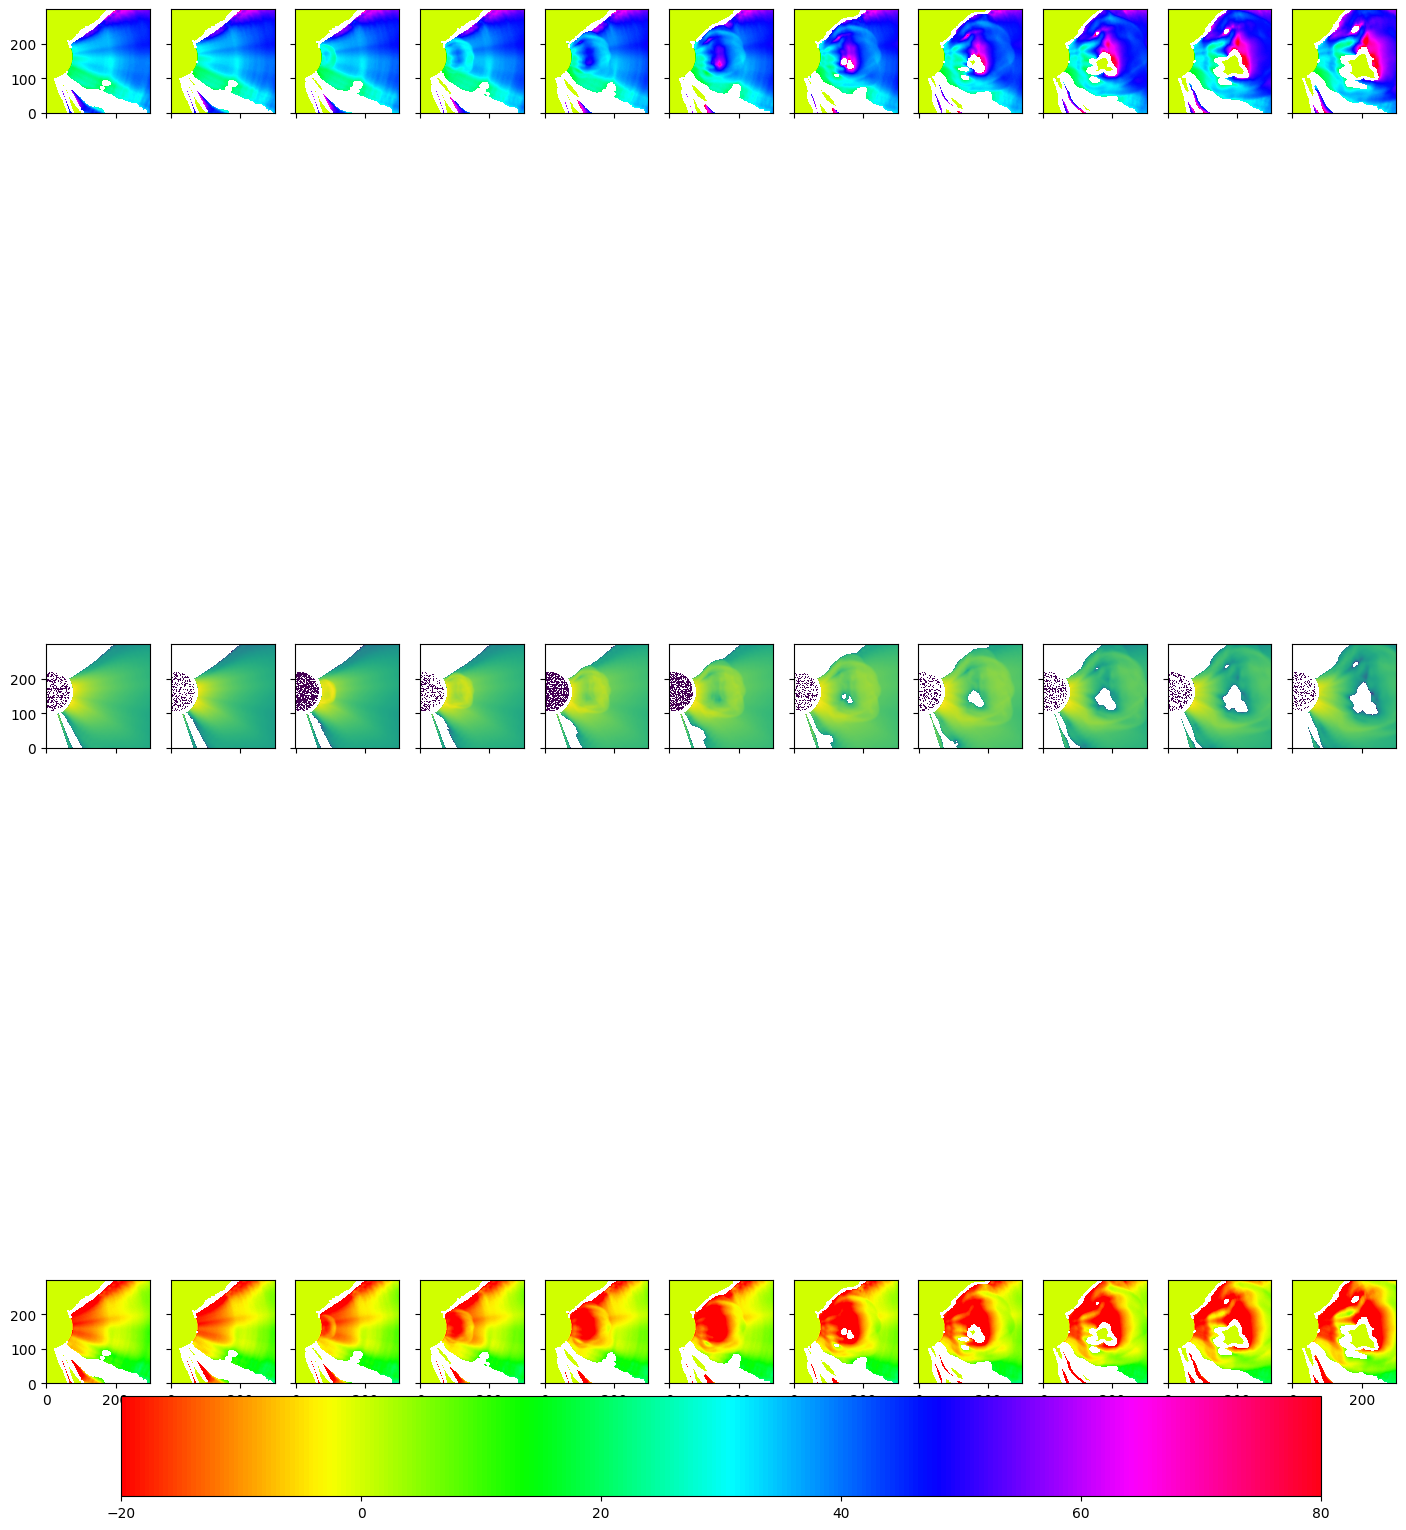

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
import mplcursors
from helper_funcs import *


fits_file_pB = fits.open('CME_0_pB\stepnum_078.fits')
fits_file_tB = fits.open('CME_0_tB\stepnum_078.fits')
fits_file_pB2 = fits.open('CME_0_pB\stepnum_020.fits')
fits_file_tB2 = fits.open('CME_0_tB\stepnum_020.fits')

image_data_pB = fits_file_pB[0].data
image_data_tB = fits_file_tB[0].data
image_data_pB2 = fits_file_pB2[0].data
image_data_tB2 = fits_file_tB2[0].data

# print(image_data_pB)
# print(image_data_tB)
print(image_data_pB[900][600])
print(image_data_tB[900][600])

plt.figure()
plt.imshow(image_data_pB, origin='lower', norm=LogNorm())
plt.colorbar()
# plt.show()
plt.figure()
plt.imshow(image_data_tB, origin='lower', norm=LogNorm())
plt.colorbar()


front_array = [[0,0],[0,0],[108,159],[140,160],[171,163],[195,175],[216,185],[241,167],[259,183],[274,172],[0,0]]
front_array = np.array(front_array)



xMin = 500
xMax = 800

yMin = 350
yMax = 650

# xMin = 0
# xMax = 1023

# yMin = 0
# yMax = 1023

pBdata = []
tBdata =[]

for i in range(5,60,5):
    if i < 10:
        st = '0' + str(i)
    else:
        st = str(i)
    fits_file_pB = fits.open(f'CME_0_pB\stepnum_0{st}.fits')
    fits_file_tB = fits.open(f'CME_0_tB\stepnum_0{st}.fits')
    pBdata.append(fits_file_pB[0].data)
    tBdata.append(fits_file_tB[0].data)

posMats = np.empty((len(pBdata),len(pBdata[0]),len(pBdata[0][0])))
negMats = np.empty((len(pBdata),len(pBdata[0]),len(pBdata[0][0])))

for i in range(len(pBdata)):
    print("Processing subtraction for image ", i)
    pBdata[i] = subtractRadialMedian(pBdata[i], calculate_median_pixel_values(pBdata[i]))   
    tBdata[i] = subtractRadialMedian(tBdata[i], calculate_median_pixel_values(tBdata[i]))  
    # pBdata[i] = minSmooth(pBdata[i], 50)  
    # tBdata[i] = minSmooth(tBdata[i], 50)   
    

for i in range(len(pBdata)):
    print("Processing calculations for image ", i)
    posMat, negMat = calculateExitAngles(pBdata[i], tBdata[i], (xMin,xMax), (yMin,yMax))
    posMats[i] = posMat
    negMats[i] = negMat



vmin = -20
vmax = 80

# plt.figure()
# plt.imshow(image_data_pB, origin = 'lower', norm = LogNorm())
# plt.colorbar()
# plt.show()

# plt.figure()
# plt.imshow(image_data_tB, origin = 'lower', norm = LogNorm())
# plt.colorbar()
# plt.show()


fig, axs = plt.subplots(3,len(pBdata),figsize=(15, 20), sharex=True, sharey=True)


for i in range(len(pBdata)): 
    axs[0,i].imshow(posMats[i][yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')
    axs[1,i].imshow(pBdata[i][yMin:yMax,xMin:xMax], origin='lower', norm=LogNorm())
    im = axs[2,i].imshow(negMats[i][yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')


# fig, axs = plt.subplots(2,6,figsize=(15, 20), sharex=True, sharey=True)


# for i in range(6):
#     axs[0,i].imshow(negMats[i][yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')
#     if i < 5:
#         im = axs[1,i].imshow(negMats[i+6][yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')
    

# Add data cursor to the plot
# print(posMats)
posMatsData = posMats[:,yMin:yMax,xMin:xMax]
negMatsData = negMats[:,yMin:yMax,xMin:xMax]
posMatsGraph = np.zeros(len(posMatsData))
negMatsGraph = np.zeros(len(negMatsData))


    

# Show the plot

fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
cbar_ax = fig.add_axes([0.1, 0.1, 0.8, 0.05])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')



[25.73472251 29.44618509 32.85560715 36.50590433 39.55665996 42.97587885
 45.60408948]
[-8.85148478 -6.94343867 -4.90583563 -4.25687097 -3.47009221 -2.7123787
 -2.02948116]


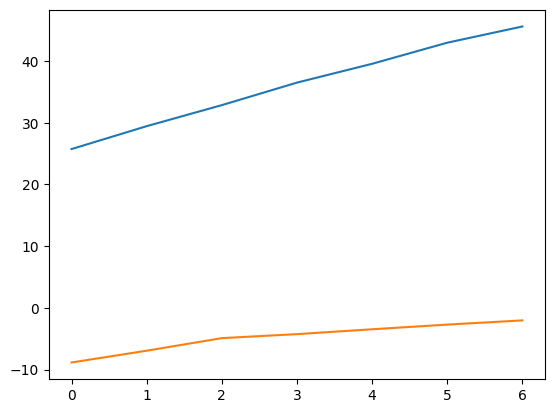

In [13]:
for i in range(len(posMatsData)):
    posMatsGraph[i] = posMatsData[i][front_array[i][1],front_array[i][0]]
    negMatsGraph[i] = negMatsData[i][front_array[i][1],front_array[i][0]]
print(posMatsGraph[2:9])
print(negMatsGraph[2:9])

plt.figure()   
plt.plot(posMatsGraph[2:9], label='Positive Exit Angle')
plt.plot(negMatsGraph[2:9], label='Negative Exit Angle') 

plt.show()

In [12]:
print(posMatsData[0][88, 37])

43.57752427162564
